## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv('housing.csv')
df2 = pd.get_dummies(df, columns=['ocean_proximity'],drop_first = True, dtype= int)
df3 = df2.copy()
X = df3[['total_rooms', 'total_bedrooms', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']]
y = df3[['median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=28)


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [6]:
arvore = DecisionTreeRegressor(max_depth=2)
arvore.fit(X_train, y_train)
y_train_pred = arvore.predict(X_train)
y_test_pred = arvore.predict(X_test)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [8]:
path = arvore.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 7.39615335e+08, 1.72521408e+09, 3.99861905e+09]),
 'impurities': array([6.71528244e+09, 7.45489778e+09, 9.18011186e+09, 1.31787309e+10])}

In [9]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [11]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=28, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

In [12]:
clfs

[DecisionTreeRegressor(random_state=28),
 DecisionTreeRegressor(ccp_alpha=739615335.4563732, random_state=28),
 DecisionTreeRegressor(ccp_alpha=1725214081.6246586, random_state=28),
 DecisionTreeRegressor(ccp_alpha=3998619046.678213, random_state=28)]

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
train_scores = [mean_squared_error(y_train , clf.predict(X_train)) for clf in clfs]
test_scores  = [mean_squared_error(y_test  , clf.predict(X_test )) for clf in clfs]


In [15]:
train_scores

[9932273.824418604, 6715282443.344188, 9180111860.425201, 13178730907.103424]

In [16]:
test_scores

[9205611197.653101, 6882122670.75846, 9227647717.473635, 13727754778.267862]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

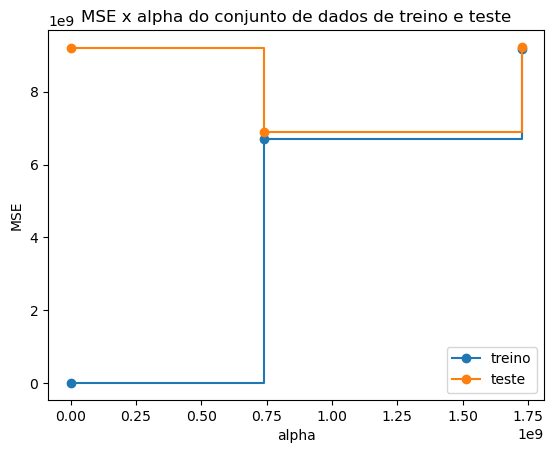

In [18]:
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("MSE")
ax.set_title("MSE x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [19]:
arvore_final = DecisionTreeRegressor(random_state=28, ccp_alpha=0.75e09)
arvore_final.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=750000000.0, random_state=28)

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [22]:
r2_final = arvore_final.score(X_test, y_test)
print(f'R-quadrado é {r2_final:.2f}')

R-quadrado é 0.45


### 7. Visualize esta árvore.

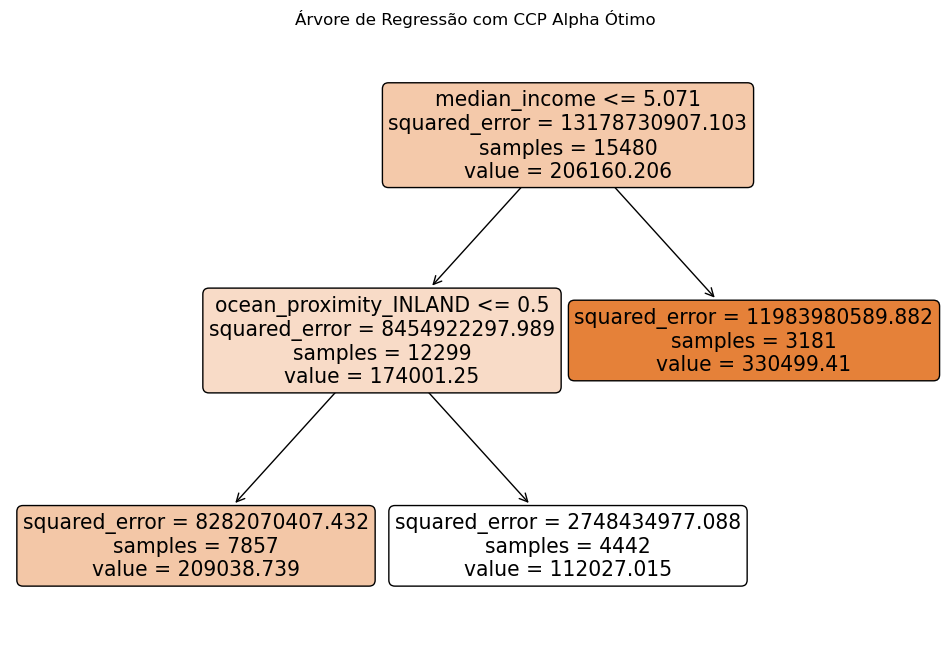

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(arvore_final, feature_names=X.columns, filled=True, rounded=True)
plt.title("Árvore de Regressão com CCP Alpha Ótimo")
plt.show()